# 6.2 Exploring relationships in data

## Within this notebook

### 1. Data import
### 2. Choosing variables suitable for exploratory visual analysis
### 3. A correlation matrix heatmap
### 4. A scatterplot for the variables with the strongest correlations
### 5. A pair plot
### 6. A categorical plot
### 7. Data questions answered and further data exploration
### 8. Define any potential hypotheses

## Step One - import libraries and dataset

In [49]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [50]:
path=r'C:\Users\chloe\Documents\Documents\Documents\Career Foundry\Data Immersion'

In [51]:
fullHealthFactors = pd.read_csv(os.path.join(path, 'Achievement 6', 'fullHealthFactors.csv'), header = 0)
fullHealthFactors2 = fullHealthFactors = pd.read_csv(os.path.join(path, 'Achievement 6', '6.1 Full dataset 2.csv'))
healthFactors = pd.read_csv(os.path.join(path, 'Achievement 6', '6.1 Cleaned Sourcing Data_deBeus.csv'))

In [52]:
fullHealthFactors

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,...,% Drive Alone to Work,95% CI - Low.6,95% CI - High.6,Quartile.15,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.7,95% CI - High.7,Quartile.16,Unnamed: 104
0,1000,Alabama,NaN,NaN,88086.0,10350.0,19.0,3.5,5.1,10.0,...,84,83.0,84.0,NaN,2146674,35,35.0,35.0,NaN,NaN
1,1001,Alabama,Autauga,NaN,836.0,8027.0,17.0,3.4,4.8,10.0,...,86,84.0,89.0,3.0,26458,42,36.0,47.0,3.0,NaN
2,1003,Alabama,Baldwin,NaN,3377.0,8118.0,15.0,3.3,4.8,8.0,...,81,80.0,83.0,1.0,102650,38,35.0,40.0,2.0,NaN
3,1005,Alabama,Barbour,NaN,539.0,12877.0,28.0,4.6,5.0,12.0,...,83,80.0,86.0,2.0,8461,37,31.0,42.0,2.0,NaN
4,1007,Alabama,Bibb,NaN,460.0,11191.0,22.0,4.0,5.4,10.0,...,87,82.0,92.0,4.0,7994,55,46.0,64.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,NaN,599.0,8419.0,12.0,3.0,4.3,10.0,...,77,73.0,80.0,3.0,20579,19,16.0,23.0,3.0,NaN
3189,56039,Wyoming,Teton,NaN,111.0,3283.0,8.0,2.2,3.4,8.0,...,65,60.0,70.0,1.0,14590,14,10.0,18.0,2.0,NaN
3190,56041,Wyoming,Uinta,NaN,287.0,9358.0,12.0,3.0,4.2,10.0,...,79,75.0,84.0,3.0,9606,18,14.0,23.0,2.0,NaN
3191,56043,Wyoming,Washakie,NaN,115.0,7074.0,12.0,2.9,3.9,7.0,...,81,76.0,86.0,4.0,3826,9,5.0,13.0,1.0,NaN


In [53]:
healthFactors.head()

,State,County,alcoholInvolvementDrivingDeaths,alcoholInvolvementDrivingDeathsRate,severeHousingProblemsRate,housingCostBurdenRate,housingOvercrowdingRate,Inadequate Facilities,driveAloneToWorkRate,householdsWithBroadbandAccess,householdsWithBroadbandAccessRate,alcoholDrivingDeathsRateCategory,housingProblemsRateCategory,broadbandAccessRateCategory
0,Alabama,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,Autauga,18.0,32.1,14.4,12.6,1.1,1.6,86.4,18679.0,85.5,2.0,2.0,2.0
2,Alabama,Baldwin,57.0,32.2,12.2,10.6,1.3,0.6,81.4,76602.0,87.9,2.0,1.0,2.0
3,Alabama,Barbour,12.0,37.5,16.2,13.5,3.9,0.6,83.1,5872.0,64.6,2.0,2.0,1.0
4,Alabama,Bibb,6.0,21.4,11.3,8.0,1.2,2.2,87.0,5284.0,74.6,1.0,1.0,1.0


In [54]:
healthFactors.shape

(3194, 14)

# Step Two - Choosing variables

In [55]:
healthFactors.corr(numeric_only=True)

,alcoholInvolvementDrivingDeaths,alcoholInvolvementDrivingDeathsRate,severeHousingProblemsRate,housingCostBurdenRate,housingOvercrowdingRate,Inadequate Facilities,driveAloneToWorkRate,householdsWithBroadbandAccess,householdsWithBroadbandAccessRate,alcoholDrivingDeathsRateCategory,housingProblemsRateCategory,broadbandAccessRateCategory
alcoholInvolvementDrivingDeaths,1.000000,0.002492,0.012199,0.999233,0.999122,0.998861,-0.004281,0.999613,0.010026,0.021573,0.027249,-0.008246
alcoholInvolvementDrivingDeathsRate,0.002492,1.000000,0.034427,-0.000058,0.000929,0.001764,-0.120980,-0.001134,0.055383,0.758990,-0.001056,0.051557
severeHousingProblemsRate,0.012199,0.034427,1.000000,0.004464,0.012051,0.011218,-0.380083,0.016213,-0.030885,0.067356,0.689674,0.042799
housingCostBurdenRate,0.999233,-0.000058,0.004464,1.000000,0.999841,0.999695,-0.001038,0.998555,0.000690,0.016292,0.022001,-0.016932
housingOvercrowdingRate,0.999122,0.000929,0.012051,0.999841,1.000000,0.999781,-0.005866,0.998429,-0.002312,0.016154,0.023782,-0.019104
Inadequate Facilities,0.998861,0.001764,0.011218,0.999695,0.999781,1.000000,-0.009080,0.998114,-0.004372,0.015831,0.021092,-0.020603
driveAloneToWorkRate,-0.004281,-0.120980,-0.380083,-0.001038,-0.005866,-0.009080,1.000000,-0.012110,-0.180418,-0.036563,-0.180012,-0.145895
householdsWithBroadbandAccess,0.999613,-0.001134,0.016213,0.998555,0.998429,0.998114,-0.012110,1.000000,0.015358,0.017806,0.028830,-0.003875
householdsWithBroadbandAccessRate,0.010026,0.055383,-0.030885,0.000690,-0.002312,-0.004372,-0.180418,0.015358,1.000000,0.123221,-0.027971,0.752429
alcoholDrivingDeathsRateCategory,0.021573,0.758990,0.067356,0.016292,0.016154,0.015831,-0.036563,0.017806,0.123221,1.000000,0.059407,0.112675


In [56]:
#let's start with severeHousingProblemsRate and alcoholInvolvementDrivingDeathsRate

# Step Three - Matrix heatmap

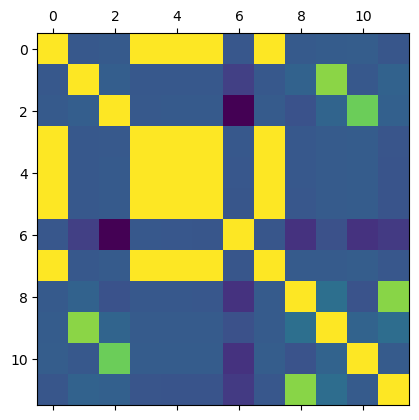

In [57]:
plt.matshow(healthFactors.corr(numeric_only = True))
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

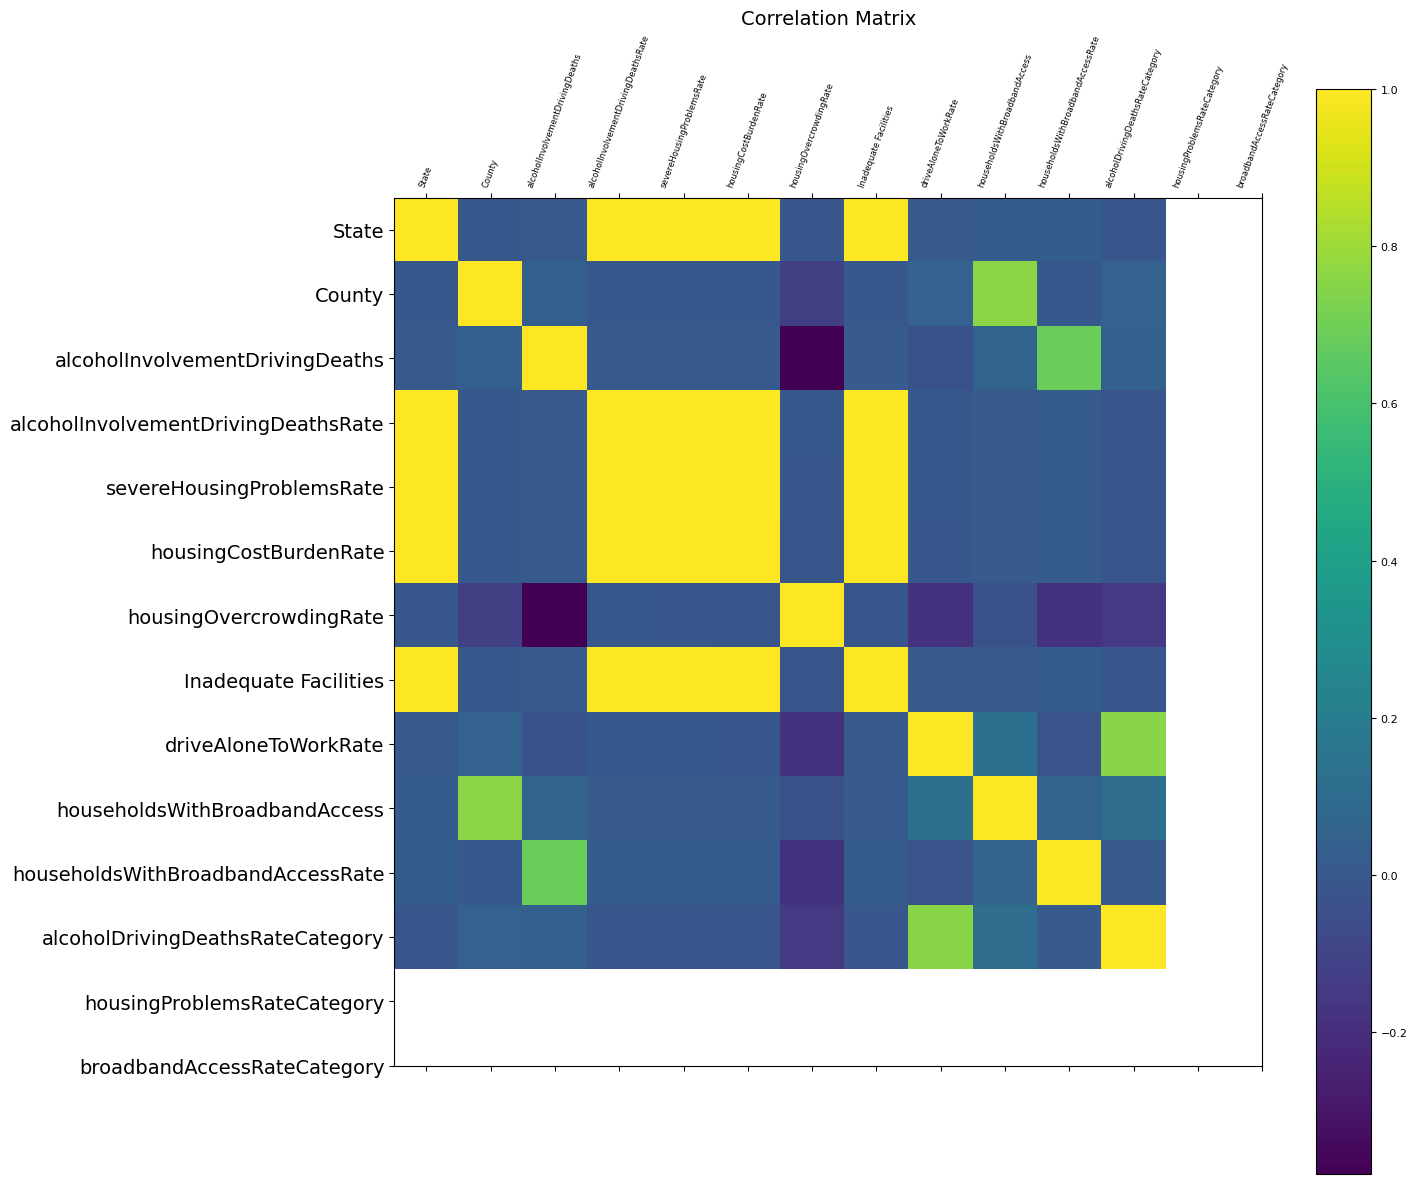

In [58]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(14, 14)) # figure size 
plt.matshow(healthFactors.corr(numeric_only=True), fignum=f.number) # type of plot
plt.xticks(range(healthFactors.shape[1]), healthFactors.columns, fontsize=6, rotation=70) # x axis labels
plt.yticks(range(healthFactors.shape[1]), healthFactors.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [59]:
healthFactors.columns

Index(['State', 'County', 'alcoholInvolvementDrivingDeaths',
       'alcoholInvolvementDrivingDeathsRate', 'severeHousingProblemsRate',
       'housingCostBurdenRate', 'housingOvercrowdingRate',
       'Inadequate Facilities', 'driveAloneToWorkRate',
       'householdsWithBroadbandAccess', 'householdsWithBroadbandAccessRate',
       'alcoholDrivingDeathsRateCategory', 'housingProblemsRateCategory',
       'broadbandAccessRateCategory'],
      dtype='object')

In [60]:
healthSubset = healthFactors[['alcoholInvolvementDrivingDeaths', 'alcoholInvolvementDrivingDeathsRate', 'severeHousingProblemsRate', 'housingCostBurdenRate', 'housingOvercrowdingRate', 'Inadequate Facilities', 'driveAloneToWorkRate', 'householdsWithBroadbandAccess', 'householdsWithBroadbandAccessRate']]

In [61]:
healthSubset

,alcoholInvolvementDrivingDeaths,alcoholInvolvementDrivingDeathsRate,severeHousingProblemsRate,housingCostBurdenRate,housingOvercrowdingRate,Inadequate Facilities,driveAloneToWorkRate,householdsWithBroadbandAccess,householdsWithBroadbandAccessRate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0,32.100000,14.400000,12.600000,1.100000,1.600000,86.400000,18679.0,85.500000
2,57.0,32.200000,12.200000,10.600000,1.300000,0.600000,81.400000,76602.0,87.900000
3,12.0,37.500000,16.200000,13.500000,3.900000,0.600000,83.100000,5872.0,64.600000
4,6.0,21.400000,11.300000,8.000000,1.200000,2.200000,87.000000,5284.0,74.600000
...,...,...,...,...,...,...,...,...,...
3189,2.0,18.181818,15.410200,10.016694,5.820399,1.995565,65.119945,8622.0,90.462701
3190,4.0,17.391304,8.689928,5.756359,2.962475,0.394997,79.221320,6957.0,90.644951
3191,0.0,0.000000,7.280832,5.688351,2.080238,0.297177,81.076843,2879.0,85.430267
3192,2.0,22.222222,12.283737,9.960728,1.903114,0.865052,68.154362,2239.0,81.299927


## I realized the last row is causing issues with the graphs and correlations because it is a grand total row, so let's delete it

In [62]:
healthFactors.drop([3193], axis = 0, inplace = True)
healthFactors

,State,County,alcoholInvolvementDrivingDeaths,alcoholInvolvementDrivingDeathsRate,severeHousingProblemsRate,housingCostBurdenRate,housingOvercrowdingRate,Inadequate Facilities,driveAloneToWorkRate,householdsWithBroadbandAccess,householdsWithBroadbandAccessRate,alcoholDrivingDeathsRateCategory,housingProblemsRateCategory,broadbandAccessRateCategory
0,Alabama,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,Autauga,18.0,32.100000,14.400000,12.600000,1.100000,1.600000,86.400000,18679.0,85.500000,2.0,2.0,2.0
2,Alabama,Baldwin,57.0,32.200000,12.200000,10.600000,1.300000,0.600000,81.400000,76602.0,87.900000,2.0,1.0,2.0
3,Alabama,Barbour,12.0,37.500000,16.200000,13.500000,3.900000,0.600000,83.100000,5872.0,64.600000,2.0,2.0,1.0
4,Alabama,Bibb,6.0,21.400000,11.300000,8.000000,1.200000,2.200000,87.000000,5284.0,74.600000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,Wyoming,Sweetwater,11.0,18.333333,10.370370,8.224543,2.022544,0.611916,76.782157,13730.0,88.415223,1.0,1.0,2.0
3189,Wyoming,Teton,2.0,18.181818,15.410200,10.016694,5.820399,1.995565,65.119945,8622.0,90.462701,1.0,2.0,2.0
3190,Wyoming,Uinta,4.0,17.391304,8.689928,5.756359,2.962475,0.394997,79.221320,6957.0,90.644951,1.0,1.0,2.0
3191,Wyoming,Washakie,0.0,0.000000,7.280832,5.688351,2.080238,0.297177,81.076843,2879.0,85.430267,0.0,1.0,2.0


In [63]:
healthSubset.drop([3193], axis=0, inplace=True)
healthSubset

C:\Users\chloe\AppData\Local\Temp\ipykernel_8236\469276610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthSubset.drop([3193], axis=0, inplace=True)


,alcoholInvolvementDrivingDeaths,alcoholInvolvementDrivingDeathsRate,severeHousingProblemsRate,housingCostBurdenRate,housingOvercrowdingRate,Inadequate Facilities,driveAloneToWorkRate,householdsWithBroadbandAccess,householdsWithBroadbandAccessRate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0,32.100000,14.400000,12.600000,1.100000,1.600000,86.400000,18679.0,85.500000
2,57.0,32.200000,12.200000,10.600000,1.300000,0.600000,81.400000,76602.0,87.900000
3,12.0,37.500000,16.200000,13.500000,3.900000,0.600000,83.100000,5872.0,64.600000
4,6.0,21.400000,11.300000,8.000000,1.200000,2.200000,87.000000,5284.0,74.600000
...,...,...,...,...,...,...,...,...,...
3188,11.0,18.333333,10.370370,8.224543,2.022544,0.611916,76.782157,13730.0,88.415223
3189,2.0,18.181818,15.410200,10.016694,5.820399,1.995565,65.119945,8622.0,90.462701
3190,4.0,17.391304,8.689928,5.756359,2.962475,0.394997,79.221320,6957.0,90.644951
3191,0.0,0.000000,7.280832,5.688351,2.080238,0.297177,81.076843,2879.0,85.430267


In [64]:
healthSubset

,alcoholInvolvementDrivingDeaths,alcoholInvolvementDrivingDeathsRate,severeHousingProblemsRate,housingCostBurdenRate,housingOvercrowdingRate,Inadequate Facilities,driveAloneToWorkRate,householdsWithBroadbandAccess,householdsWithBroadbandAccessRate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0,32.100000,14.400000,12.600000,1.100000,1.600000,86.400000,18679.0,85.500000
2,57.0,32.200000,12.200000,10.600000,1.300000,0.600000,81.400000,76602.0,87.900000
3,12.0,37.500000,16.200000,13.500000,3.900000,0.600000,83.100000,5872.0,64.600000
4,6.0,21.400000,11.300000,8.000000,1.200000,2.200000,87.000000,5284.0,74.600000
...,...,...,...,...,...,...,...,...,...
3188,11.0,18.333333,10.370370,8.224543,2.022544,0.611916,76.782157,13730.0,88.415223
3189,2.0,18.181818,15.410200,10.016694,5.820399,1.995565,65.119945,8622.0,90.462701
3190,4.0,17.391304,8.689928,5.756359,2.962475,0.394997,79.221320,6957.0,90.644951
3191,0.0,0.000000,7.280832,5.688351,2.080238,0.297177,81.076843,2879.0,85.430267


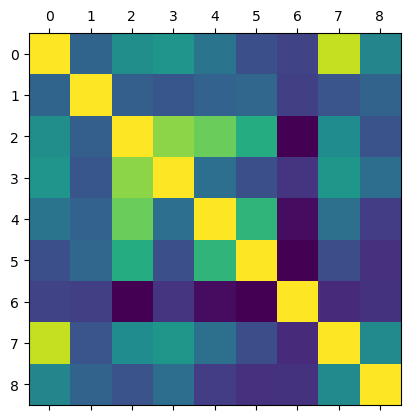

In [65]:
plt.matshow(healthSubset.corr(numeric_only = True))
plt.show()

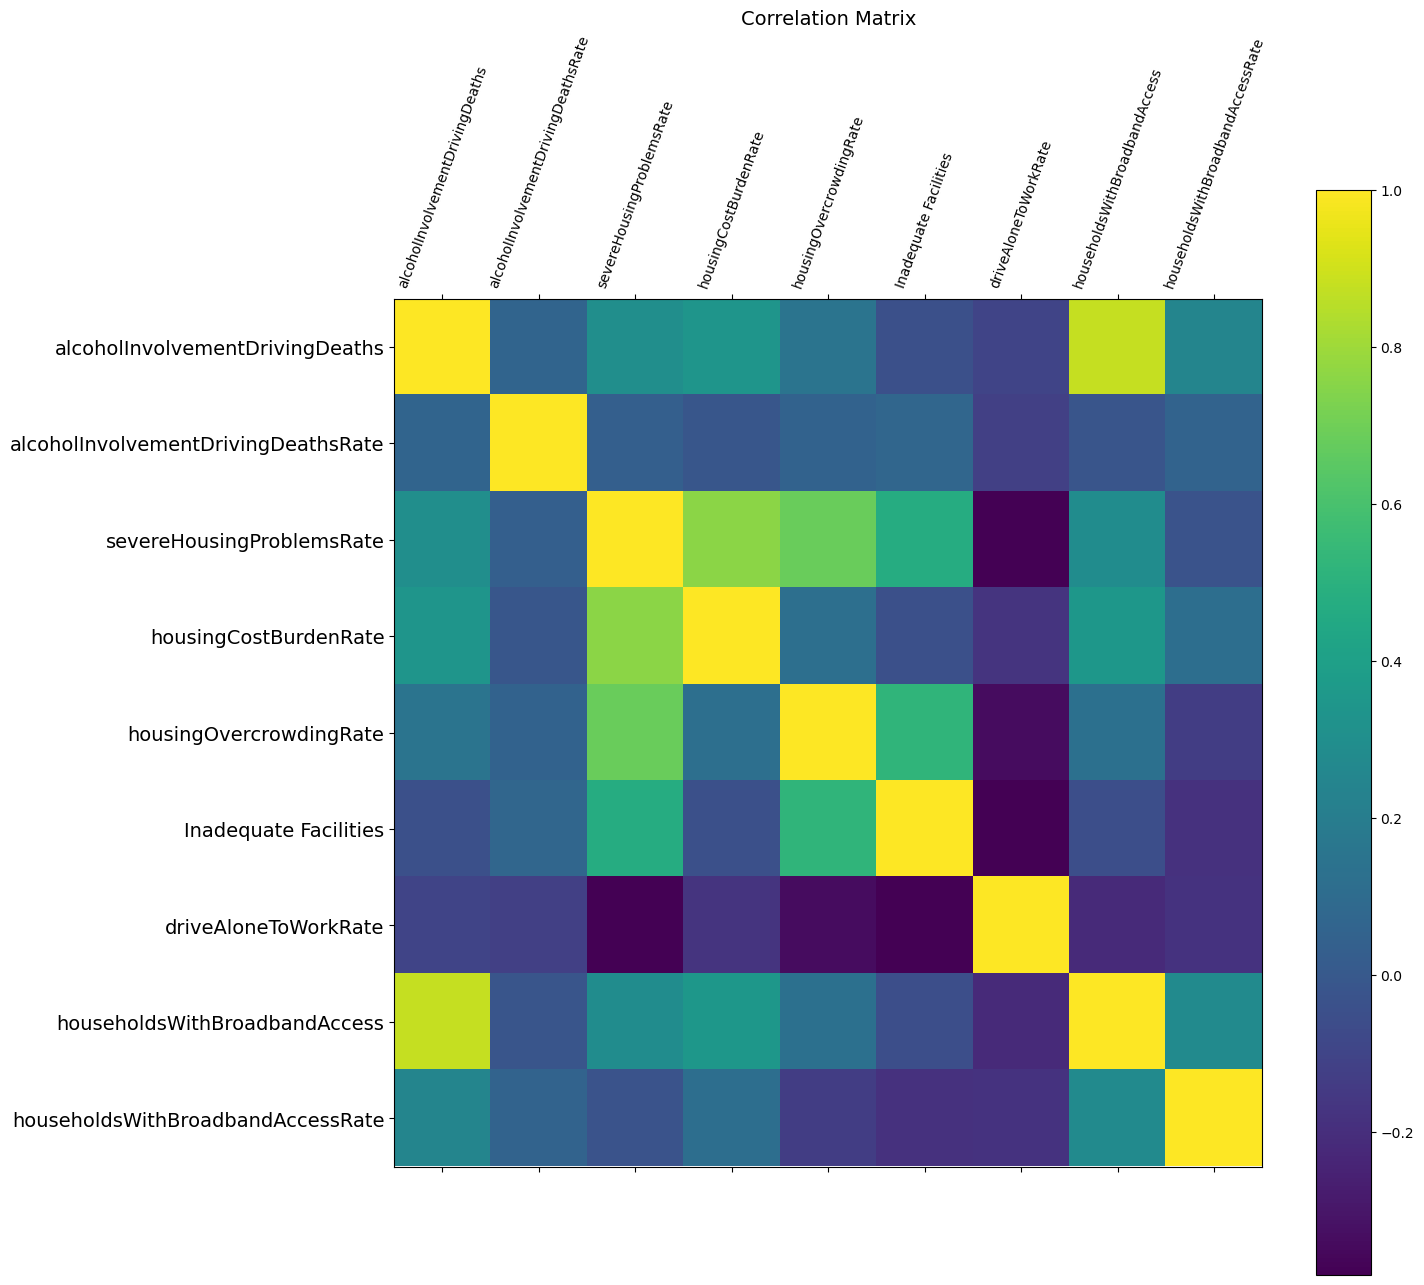

In [66]:
# Add labels, a legend, and change the size of the heatmap

plt.figure(figsize=(14, 14)) # figure size 
plt.matshow(healthSubset.corr(numeric_only=True), fignum=f.number) # type of plot
plt.xticks(range(healthSubset.shape[1]), healthSubset.columns, fontsize=10, rotation=70) # x axis labels
plt.yticks(range(healthSubset.shape[1]), healthSubset.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
##for y in range(healthSubset.shape[0]):
  ##  for x in range(healthSubset.shape[1]):
    ##    text = plt.text(x, y, '%.4f' % healthSubset.iloc[y, x], horizontalalignment = 'center')
        
plt.show()

## Seaborn heatmap

In [67]:
healthSubset

,alcoholInvolvementDrivingDeaths,alcoholInvolvementDrivingDeathsRate,severeHousingProblemsRate,housingCostBurdenRate,housingOvercrowdingRate,Inadequate Facilities,driveAloneToWorkRate,householdsWithBroadbandAccess,householdsWithBroadbandAccessRate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0,32.100000,14.400000,12.600000,1.100000,1.600000,86.400000,18679.0,85.500000
2,57.0,32.200000,12.200000,10.600000,1.300000,0.600000,81.400000,76602.0,87.900000
3,12.0,37.500000,16.200000,13.500000,3.900000,0.600000,83.100000,5872.0,64.600000
4,6.0,21.400000,11.300000,8.000000,1.200000,2.200000,87.000000,5284.0,74.600000
...,...,...,...,...,...,...,...,...,...
3188,11.0,18.333333,10.370370,8.224543,2.022544,0.611916,76.782157,13730.0,88.415223
3189,2.0,18.181818,15.410200,10.016694,5.820399,1.995565,65.119945,8622.0,90.462701
3190,4.0,17.391304,8.689928,5.756359,2.962475,0.394997,79.221320,6957.0,90.644951
3191,0.0,0.000000,7.280832,5.688351,2.080238,0.297177,81.076843,2879.0,85.430267


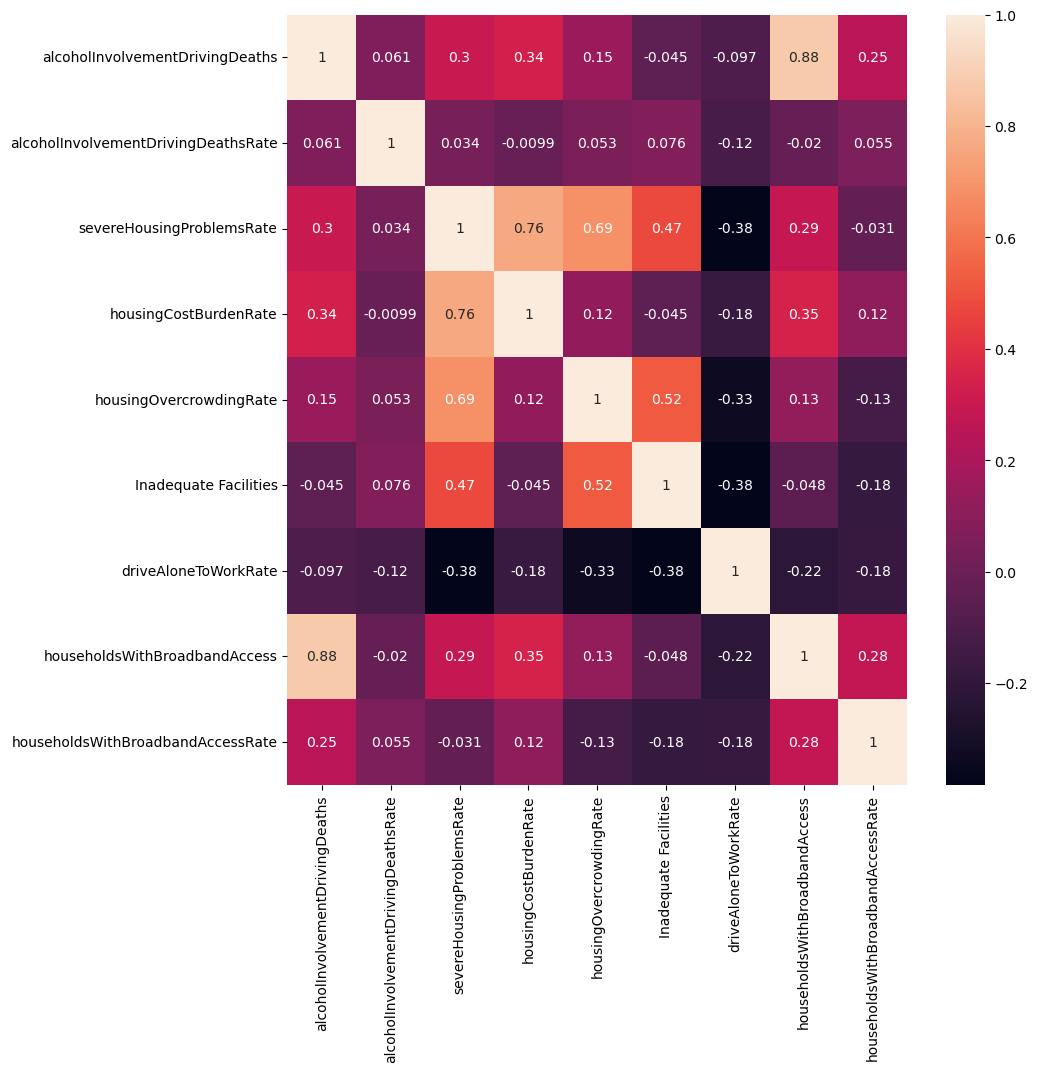

In [68]:
f, ax = plt.subplots(figsize = (10,10))
corr = sns.heatmap(healthSubset.corr(), annot = True, ax = ax)
#plt.yticks(range(len(healthSubset.columns)), healthSubset.columns, rotation = 45)

The coeffecients of each relationship express how strong the relationship between the variables are and what type of relationship they have whether positive or negative. 

For example, one of the strongest positive relationships on the table is housingOvercrowdingRate and severeHousingProblemsRate. As one goes up, so does that other. So as severeHousingProblemsRate goes up, housingOvercrowdingRate goes up which ultimately would mean that overcrowding is increasing when overall housing problems are more present.

# Step Four -  Scatterplots
let's do a scatter plot of alcohol deaths and housing cost burden rate

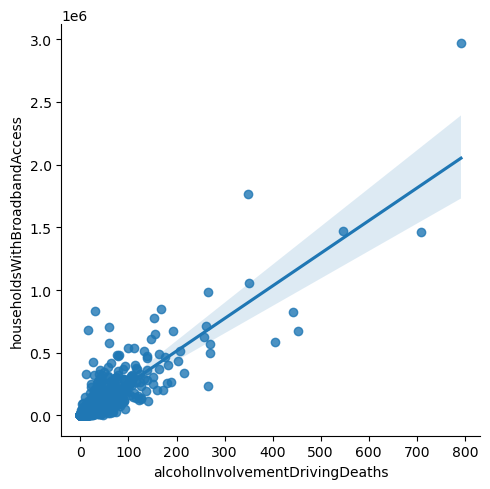

In [110]:
sns.lmplot(x = 'alcoholInvolvementDrivingDeaths', y = 'householdsWithBroadbandAccess', data = healthSubset)

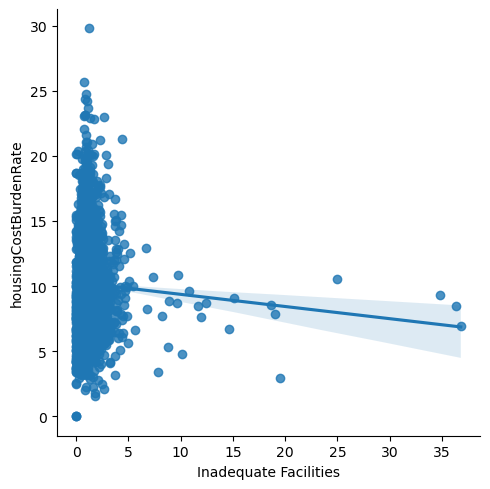

In [70]:
sns.lmplot(y = 'housingCostBurdenRate', x = 'Inadequate Facilities', data = healthSubset)

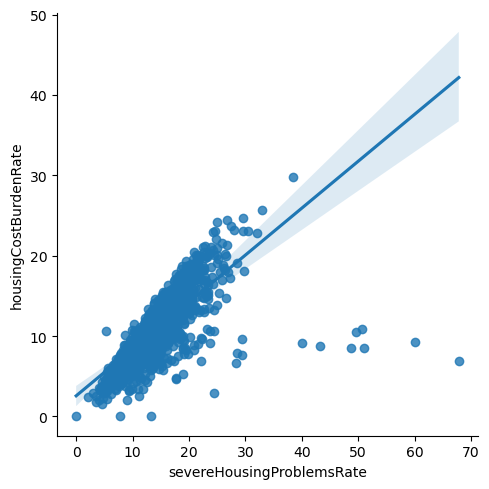

In [71]:
#housing problems and housing cost
sns.lmplot(x = 'severeHousingProblemsRate', y = 'housingCostBurdenRate', data = healthSubset)

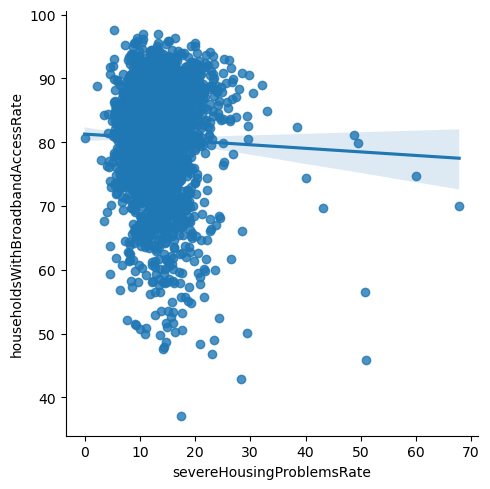

In [72]:
sns.lmplot(x = 'severeHousingProblemsRate', y = 'householdsWithBroadbandAccessRate', data = healthSubset)

There aren't as many strong relationships as I was hoping for, but it's helpful to see the numbers within the heatmap expressed visually as all points are represented in the graphs. 

There is no clear variable right now that relates to broadband access or why it may occur.

Although, alcohol related driving deaths does have a strong positive correlation with broadband access, but keep in mind this is not causation. 

# Step Five - Pair Plots

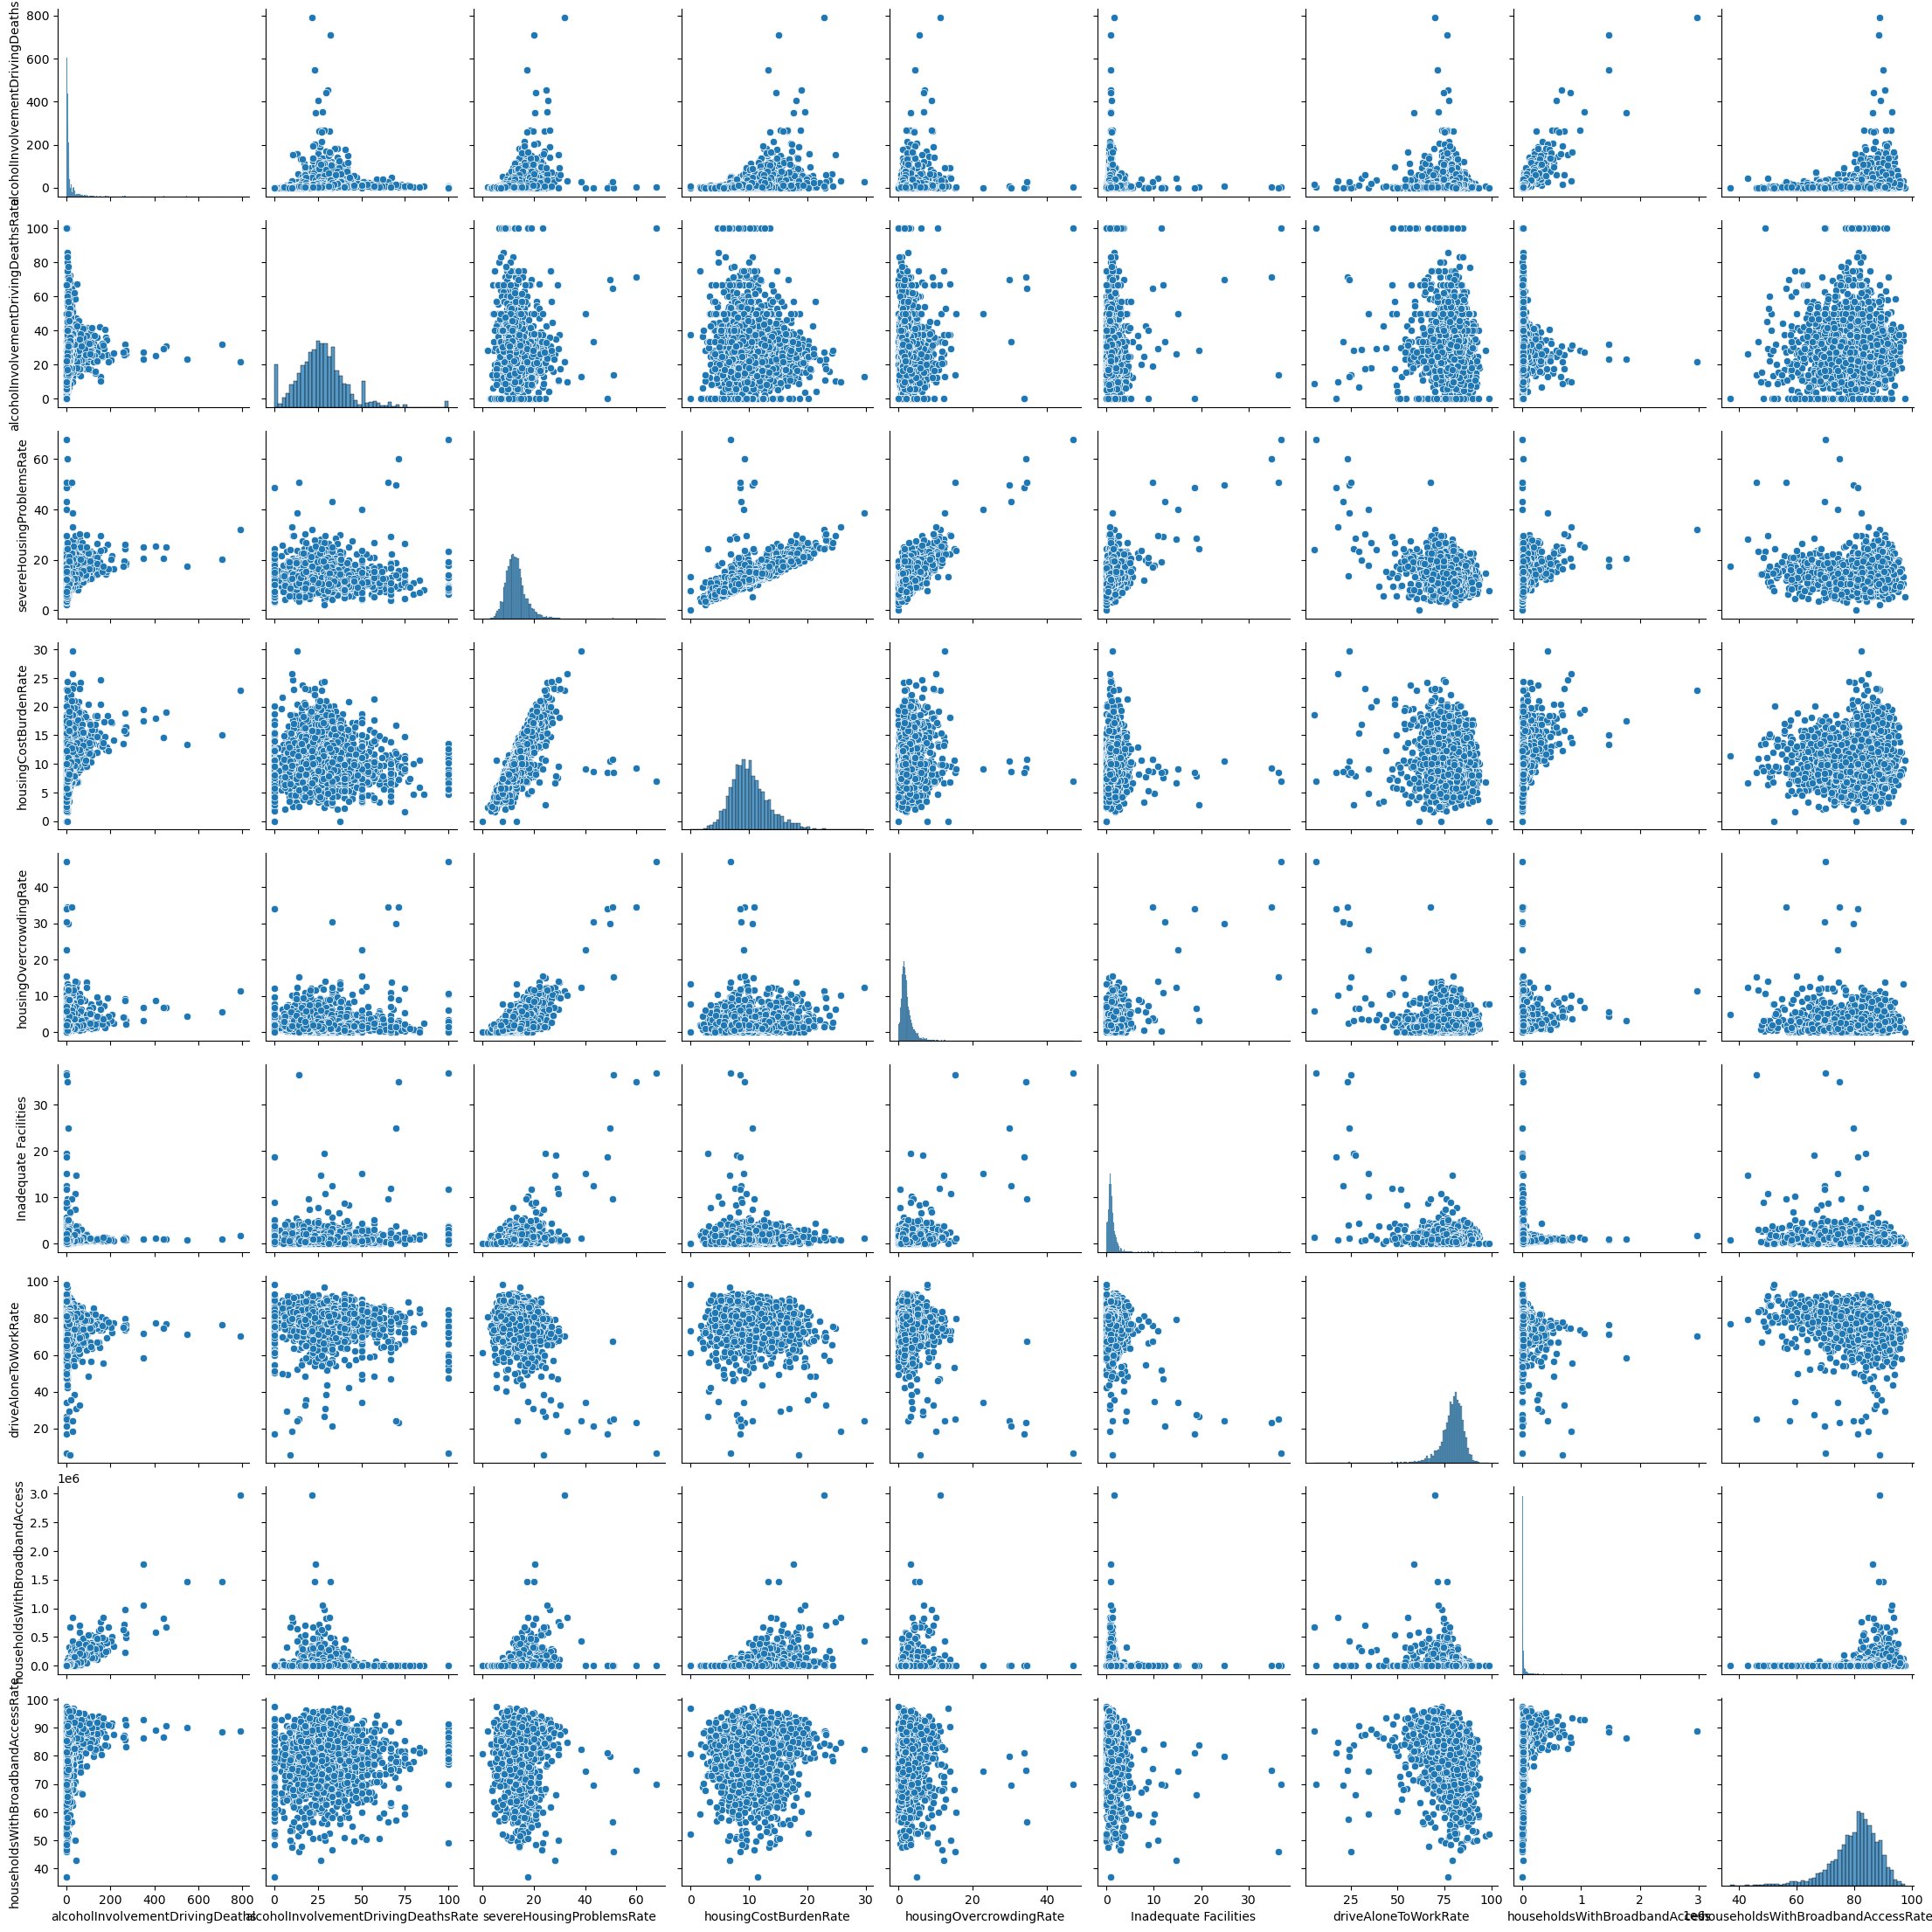

In [81]:
pairPlot = sns.pairplot(healthSubset)

I'd like to further explore broadband access and inadequate facilities because of the shape of the graph - it seems there may be some sort of inverse relationship.

Drive alone to work and alcohol involvment driving death rate as the graph is  abit spread out with a high occurence of driving alone amongst the entire spectrum of death rates.

# Step Six - Categorical Plot

In [82]:
healthFactors

,State,County,alcoholInvolvementDrivingDeaths,alcoholInvolvementDrivingDeathsRate,severeHousingProblemsRate,housingCostBurdenRate,housingOvercrowdingRate,Inadequate Facilities,driveAloneToWorkRate,householdsWithBroadbandAccess,householdsWithBroadbandAccessRate,alcoholDrivingDeathsRateCategory,housingProblemsRateCategory,broadbandAccessRateCategory
0,Alabama,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,Autauga,18.0,32.100000,14.400000,12.600000,1.100000,1.600000,86.400000,18679.0,85.500000,2.0,2.0,2.0
2,Alabama,Baldwin,57.0,32.200000,12.200000,10.600000,1.300000,0.600000,81.400000,76602.0,87.900000,2.0,1.0,2.0
3,Alabama,Barbour,12.0,37.500000,16.200000,13.500000,3.900000,0.600000,83.100000,5872.0,64.600000,2.0,2.0,1.0
4,Alabama,Bibb,6.0,21.400000,11.300000,8.000000,1.200000,2.200000,87.000000,5284.0,74.600000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,Wyoming,Sweetwater,11.0,18.333333,10.370370,8.224543,2.022544,0.611916,76.782157,13730.0,88.415223,1.0,1.0,2.0
3189,Wyoming,Teton,2.0,18.181818,15.410200,10.016694,5.820399,1.995565,65.119945,8622.0,90.462701,1.0,2.0,2.0
3190,Wyoming,Uinta,4.0,17.391304,8.689928,5.756359,2.962475,0.394997,79.221320,6957.0,90.644951,1.0,1.0,2.0
3191,Wyoming,Washakie,0.0,0.000000,7.280832,5.688351,2.080238,0.297177,81.076843,2879.0,85.430267,0.0,1.0,2.0


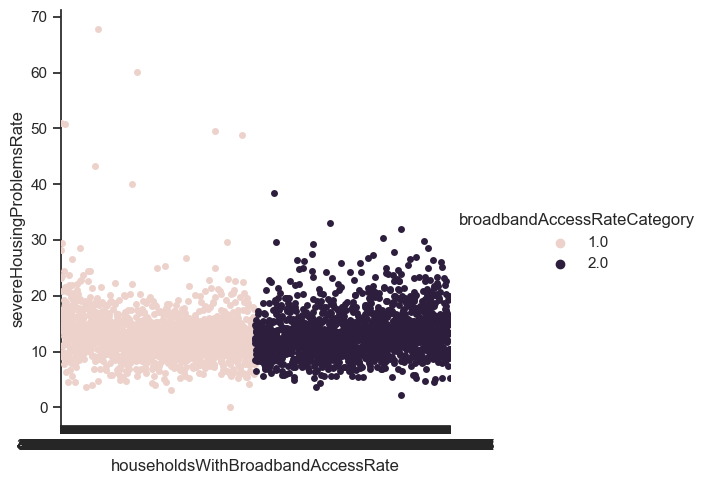

In [86]:
# I set up some categorical variables already with the final variables in healthFactors
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="householdsWithBroadbandAccessRate", y="severeHousingProblemsRate", hue="broadbandAccessRateCategory", data=healthFactors)

Those with lower rates of broadband have more points of having severe housing problems! Otherwise the existence of problems remains steady across access rates above or below the national median.

# Step Seven - Questions

1. How does overall housing burden impact internet access?
- They have a positive relationship that is not the strongest. But it's clear that those with more severe housing problems tens to err on the side of having less than the median of broadband access.
2. Which of the three types of housing burdens impact internet access the most?
- Housing cost burden rate impacts it the most with a correlation of 0.35.
3. Do those with housing burdens cause more alcohol related deaths?
- There is not a strong relationship, but it may be worth writing a hypothesis about this.
4. Is there a stronger relationship to internet connection or alcohol related deaths?
- There is a very similar relationship among severeHousingProblems and the two other variables mentioned in the question. One at .29 and the other at .3. It might be helpful to understand what's going into these correlations and lack of strong correlations.

# Step Eight - Potential Hypotheses

1. If broadband access rate goes down, severe housing problems increase.
2. If housing cost burden rate increases, broadband access rate/broadband access goes down.
3. If severe housing problems increase, then alcohol related deaths increase as well. 

# Appendix data - looking further into other data aside from the achievement requirements
## Let's consider looking at the data without the state totals in a different subset

In [73]:
healthSubset2 = healthFactors[['alcoholInvolvementDrivingDeaths', 'alcoholInvolvementDrivingDeathsRate', 'severeHousingProblemsRate', 'housingCostBurdenRate', 'housingOvercrowdingRate', 'Inadequate Facilities', 'driveAloneToWorkRate', 'householdsWithBroadbandAccess', 'householdsWithBroadbandAccessRate']]

In [78]:
#countyOnly = fullHealthFactors2['County'] == 'NaN'
#drop those with NA, so it should drop all the state level totals
healthSubset2 = healthSubset2.dropna(subset=['alcoholInvolvementDrivingDeaths'])
#healthFactors.drop([3193], axis=0, inplace=True)

#healthSubset2 = healthFactors.reset_index(drop=True)
healthSubset2

,alcoholInvolvementDrivingDeaths,alcoholInvolvementDrivingDeathsRate,severeHousingProblemsRate,housingCostBurdenRate,housingOvercrowdingRate,Inadequate Facilities,driveAloneToWorkRate,householdsWithBroadbandAccess,householdsWithBroadbandAccessRate
1,18.0,32.100000,14.400000,12.600000,1.100000,1.600000,86.400000,18679.0,85.500000
2,57.0,32.200000,12.200000,10.600000,1.300000,0.600000,81.400000,76602.0,87.900000
3,12.0,37.500000,16.200000,13.500000,3.900000,0.600000,83.100000,5872.0,64.600000
4,6.0,21.400000,11.300000,8.000000,1.200000,2.200000,87.000000,5284.0,74.600000
5,14.0,15.100000,9.900000,7.400000,1.800000,1.300000,86.400000,17244.0,81.000000
...,...,...,...,...,...,...,...,...,...
3188,11.0,18.333333,10.370370,8.224543,2.022544,0.611916,76.782157,13730.0,88.415223
3189,2.0,18.181818,15.410200,10.016694,5.820399,1.995565,65.119945,8622.0,90.462701
3190,4.0,17.391304,8.689928,5.756359,2.962475,0.394997,79.221320,6957.0,90.644951
3191,0.0,0.000000,7.280832,5.688351,2.080238,0.297177,81.076843,2879.0,85.430267


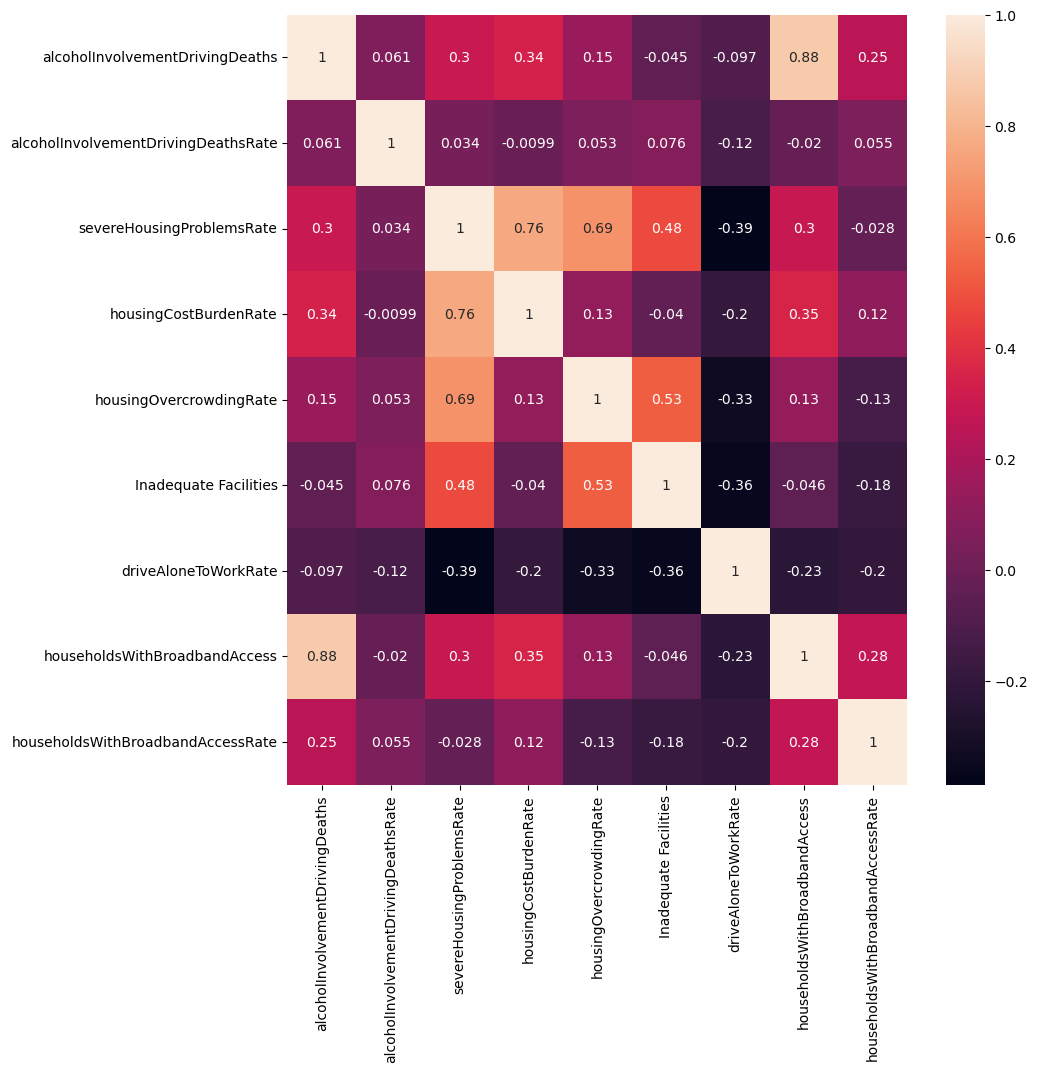

In [79]:
f, ax = plt.subplots(figsize = (10,10))
corr = sns.heatmap(healthSubset2.corr(), annot = True, ax = ax)
#plt.yticks(range(len(healthSubset.columns)), healthSubset.columns, rotation = 45)

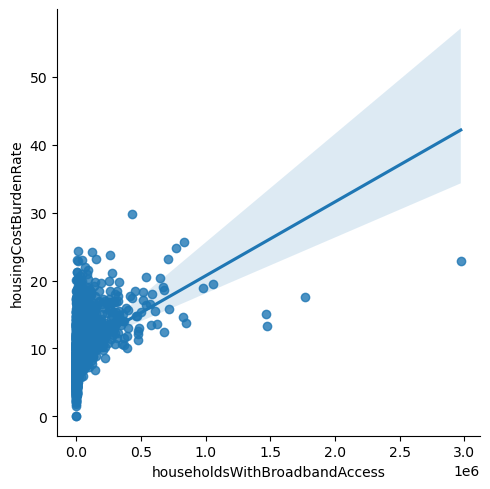

In [227]:
sns.lmplot(x = 'householdsWithBroadbandAccess', y = 'housingCostBurdenRate', data = healthSubset2)

## I am not seeing much here, so I'd like to explore looking into the full dataset!

In [230]:
fullHealthFactors.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,...,% Drive Alone to Work,95% CI - Low.6,95% CI - High.6,Quartile.15,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.7,95% CI - High.7,Quartile.16,Unnamed: 104
0,1000,Alabama,NaN,NaN,88086.0,10350.0,19.0,3.5,5.1,10.0,...,84,83.0,84.0,NaN,2146674,35,35.0,35.0,NaN,NaN
1,1001,Alabama,Autauga,NaN,836.0,8027.0,17.0,3.4,4.8,10.0,...,86,84.0,89.0,3.0,26458,42,36.0,47.0,3.0,NaN
2,1003,Alabama,Baldwin,NaN,3377.0,8118.0,15.0,3.3,4.8,8.0,...,81,80.0,83.0,1.0,102650,38,35.0,40.0,2.0,NaN
3,1005,Alabama,Barbour,NaN,539.0,12877.0,28.0,4.6,5.0,12.0,...,83,80.0,86.0,2.0,8461,37,31.0,42.0,2.0,NaN
4,1007,Alabama,Bibb,NaN,460.0,11191.0,22.0,4.0,5.4,10.0,...,87,82.0,92.0,4.0,7994,55,46.0,64.0,4.0,NaN


In [231]:
fullHealthSubset = fullHealthFactors[['% Homeowners','High School Graduation Rate', 'Average Grade Performance', '# Drug Overdose Deaths', '% Limited Access to Healthy Foods','# Food Insecure', '% Food Insecure', '% Frequent Mental Distress', 'Segregation Index', 'Drug Overdose Mortality Rate', 'Median Household Income','% Households with Severe Cost Burden', '% Households with Broadband Access']]

KeyError: "None of [Index(['% Homeowners', 'High School Graduation Rate',\n       'Average Grade Performance', '# Drug Overdose Deaths',\n       '% Limited Access to Healthy Foods', '# Food Insecure',\n       '% Food Insecure', '% Frequent Mental Distress', 'Segregation Index',\n       'Drug Overdose Mortality Rate', 'Median Household Income',\n       '% Households with Severe Cost Burden',\n       '% Households with Broadband Access'],\n      dtype='object')] are in the [columns]"

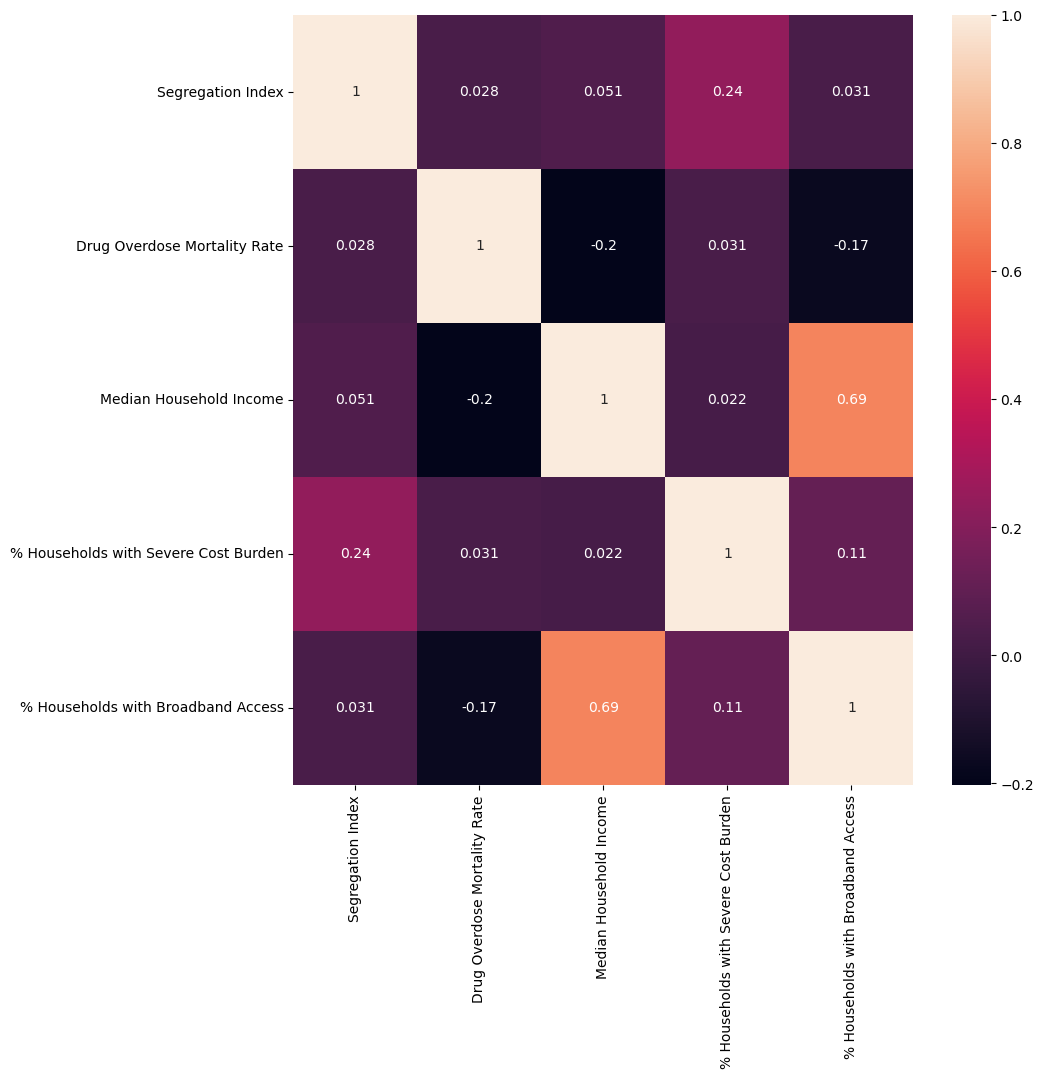

In [118]:
f, ax = plt.subplots(figsize = (10,10))
corr = sns.heatmap(fullHealthSubset.corr(), annot = True, ax = ax)
#plt.yticks(range(len(healthSubset.columns)), healthSubset.columns, rotation = 45)

## Median householdd income and broadband access have some sort of relationship...

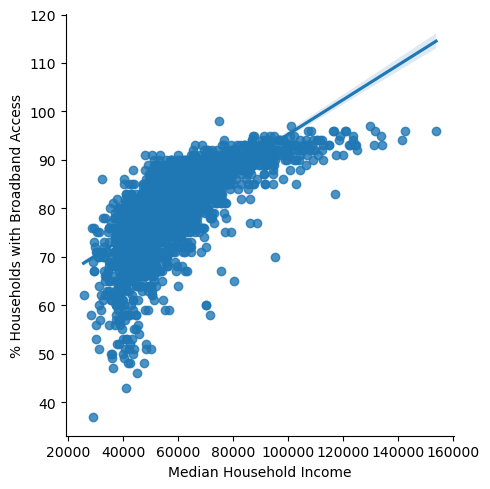

In [168]:
sns.lmplot(x = 'Median Household Income', y = '% Households with Broadband Access', data = fullHealthSubset)

## Let's try using the fuller dataset to look further into broadband access

In [183]:
fullHealthSubset.columns

Index(['Segregation Index', 'Drug Overdose Mortality Rate',
       'Median Household Income', '% Households with Severe Cost Burden',
       '% Households with Broadband Access'],
      dtype='object')

In [207]:
print(fullHealthFactors.columns)

Index(['FIPS', 'State', 'County', 'Unreliable', 'Deaths',
       'Years of Potential Life Lost Rate', '% Fair or Poor Health',
       'Average Number of Physically Unhealthy Days',
       'Average Number of Mentally Unhealthy Days', '% Low Birthweight',
       ...
       '% Drive Alone to Work', '95% CI - Low.6', '95% CI - High.6',
       'Quartile.15', '# Workers who Drive Alone',
       '% Long Commute - Drives Alone', '95% CI - Low.7', '95% CI - High.7',
       'Quartile.16', 'Unnamed: 104'],
      dtype='object', length=105)


In [209]:
fullHealthFactors.dtypes

FIPS                               int64
State                             object
County                            object
Unreliable                        object
Deaths                           float64
                                  ...   
% Long Commute - Drives Alone      int64
95% CI - Low.7                   float64
95% CI - High.7                  float64
Quartile.16                      float64
Unnamed: 104                     float64
Length: 105, dtype: object

In [208]:
fullHealthFactors.shape

(3193, 105)

In [200]:
fullHealthFactors

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,...,% Drive Alone to Work,95% CI - Low.6,95% CI - High.6,Quartile.15,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.7,95% CI - High.7,Quartile.16,Unnamed: 104
0,1000,Alabama,NaN,NaN,88086.0,10350.0,19.0,3.5,5.1,10.0,...,84,83.0,84.0,NaN,2146674,35,35.0,35.0,NaN,NaN
1,1001,Alabama,Autauga,NaN,836.0,8027.0,17.0,3.4,4.8,10.0,...,86,84.0,89.0,3.0,26458,42,36.0,47.0,3.0,NaN
2,1003,Alabama,Baldwin,NaN,3377.0,8118.0,15.0,3.3,4.8,8.0,...,81,80.0,83.0,1.0,102650,38,35.0,40.0,2.0,NaN
3,1005,Alabama,Barbour,NaN,539.0,12877.0,28.0,4.6,5.0,12.0,...,83,80.0,86.0,2.0,8461,37,31.0,42.0,2.0,NaN
4,1007,Alabama,Bibb,NaN,460.0,11191.0,22.0,4.0,5.4,10.0,...,87,82.0,92.0,4.0,7994,55,46.0,64.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,NaN,599.0,8419.0,12.0,3.0,4.3,10.0,...,77,73.0,80.0,3.0,20579,19,16.0,23.0,3.0,NaN
3189,56039,Wyoming,Teton,NaN,111.0,3283.0,8.0,2.2,3.4,8.0,...,65,60.0,70.0,1.0,14590,14,10.0,18.0,2.0,NaN
3190,56041,Wyoming,Uinta,NaN,287.0,9358.0,12.0,3.0,4.2,10.0,...,79,75.0,84.0,3.0,9606,18,14.0,23.0,2.0,NaN
3191,56043,Wyoming,Washakie,NaN,115.0,7074.0,12.0,2.9,3.9,7.0,...,81,76.0,86.0,4.0,3826,9,5.0,13.0,1.0,NaN


In [192]:
fullHealthSubset['% Households with Broadband Access']

0       82
1       85
2       88
3       65
4       75
        ..
3188    88
3189    90
3190    91
3191    85
3192    81
Name: % Households with Broadband Access, Length: 3193, dtype: int64

In [201]:
fullHealthFactors['% Households with Broadband Access']

KeyError: '% Households with Broadband Access'

In [190]:
broadbandAccess = fullHealthFactors['% Households with Broadband Access']
fullCorr = fullHealthFactors.corr(numeric_only=True)[[broadbandAccess]]

KeyError: '% Households with Broadband Access'

In [130]:
fullHealthFactors2.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,...,% Drive Alone to Work,95% CI - Low.6,95% CI - High.6,Quartile.15,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.7,95% CI - High.7,Quartile.16,Unnamed: 104
0,1000,Alabama,NaN,NaN,88086.0,10350.0,19.0,3.5,5.1,10.0,...,84,83.0,84.0,NaN,2146674,35,35.0,35.0,NaN,NaN
1,1001,Alabama,Autauga,NaN,836.0,8027.0,17.0,3.4,4.8,10.0,...,86,84.0,89.0,3.0,26458,42,36.0,47.0,3.0,NaN
2,1003,Alabama,Baldwin,NaN,3377.0,8118.0,15.0,3.3,4.8,8.0,...,81,80.0,83.0,1.0,102650,38,35.0,40.0,2.0,NaN
3,1005,Alabama,Barbour,NaN,539.0,12877.0,28.0,4.6,5.0,12.0,...,83,80.0,86.0,2.0,8461,37,31.0,42.0,2.0,NaN
4,1007,Alabama,Bibb,NaN,460.0,11191.0,22.0,4.0,5.4,10.0,...,87,82.0,92.0,4.0,7994,55,46.0,64.0,4.0,NaN


In [137]:
fullHealthFactors2

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,...,% Drive Alone to Work,95% CI - Low.6,95% CI - High.6,Quartile.15,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.7,95% CI - High.7,Quartile.16,Unnamed: 104
0,1000,Alabama,NaN,NaN,88086.0,10350.0,19.0,3.5,5.1,10.0,...,84,83.0,84.0,NaN,2146674,35,35.0,35.0,NaN,NaN
1,1001,Alabama,Autauga,NaN,836.0,8027.0,17.0,3.4,4.8,10.0,...,86,84.0,89.0,3.0,26458,42,36.0,47.0,3.0,NaN
2,1003,Alabama,Baldwin,NaN,3377.0,8118.0,15.0,3.3,4.8,8.0,...,81,80.0,83.0,1.0,102650,38,35.0,40.0,2.0,NaN
3,1005,Alabama,Barbour,NaN,539.0,12877.0,28.0,4.6,5.0,12.0,...,83,80.0,86.0,2.0,8461,37,31.0,42.0,2.0,NaN
4,1007,Alabama,Bibb,NaN,460.0,11191.0,22.0,4.0,5.4,10.0,...,87,82.0,92.0,4.0,7994,55,46.0,64.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,NaN,599.0,8419.0,12.0,3.0,4.3,10.0,...,77,73.0,80.0,3.0,20579,19,16.0,23.0,3.0,NaN
3189,56039,Wyoming,Teton,NaN,111.0,3283.0,8.0,2.2,3.4,8.0,...,65,60.0,70.0,1.0,14590,14,10.0,18.0,2.0,NaN
3190,56041,Wyoming,Uinta,NaN,287.0,9358.0,12.0,3.0,4.2,10.0,...,79,75.0,84.0,3.0,9606,18,14.0,23.0,2.0,NaN
3191,56043,Wyoming,Washakie,NaN,115.0,7074.0,12.0,2.9,3.9,7.0,...,81,76.0,86.0,4.0,3826,9,5.0,13.0,1.0,NaN


In [142]:
#countyOnly = fullHealthFactors2['County'] == 'NaN'
fullHealthFactors2 = fullHealthFactors2.dropna(subset=['County'])
fullHealthFactors2 = fullHealthFactors2.reset_index(drop=True)
fullHealthFactors2

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,...,% Drive Alone to Work,95% CI - Low.6,95% CI - High.6,Quartile.15,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.7,95% CI - High.7,Quartile.16,Unnamed: 104
0,1001,Alabama,Autauga,NaN,836.0,8027.0,17.0,3.4,4.8,10.0,...,86,84.0,89.0,3.0,26458,42,36.0,47.0,3.0,NaN
1,1003,Alabama,Baldwin,NaN,3377.0,8118.0,15.0,3.3,4.8,8.0,...,81,80.0,83.0,1.0,102650,38,35.0,40.0,2.0,NaN
2,1005,Alabama,Barbour,NaN,539.0,12877.0,28.0,4.6,5.0,12.0,...,83,80.0,86.0,2.0,8461,37,31.0,42.0,2.0,NaN
3,1007,Alabama,Bibb,NaN,460.0,11191.0,22.0,4.0,5.4,10.0,...,87,82.0,92.0,4.0,7994,55,46.0,64.0,4.0,NaN
4,1009,Alabama,Blount,NaN,1143.0,10787.0,18.0,3.9,5.4,8.0,...,86,84.0,88.0,3.0,23918,60,54.0,65.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater,NaN,599.0,8419.0,12.0,3.0,4.3,10.0,...,77,73.0,80.0,3.0,20579,19,16.0,23.0,3.0,NaN
3138,56039,Wyoming,Teton,NaN,111.0,3283.0,8.0,2.2,3.4,8.0,...,65,60.0,70.0,1.0,14590,14,10.0,18.0,2.0,NaN
3139,56041,Wyoming,Uinta,NaN,287.0,9358.0,12.0,3.0,4.2,10.0,...,79,75.0,84.0,3.0,9606,18,14.0,23.0,2.0,NaN
3140,56043,Wyoming,Washakie,NaN,115.0,7074.0,12.0,2.9,3.9,7.0,...,81,76.0,86.0,4.0,3826,9,5.0,13.0,1.0,NaN


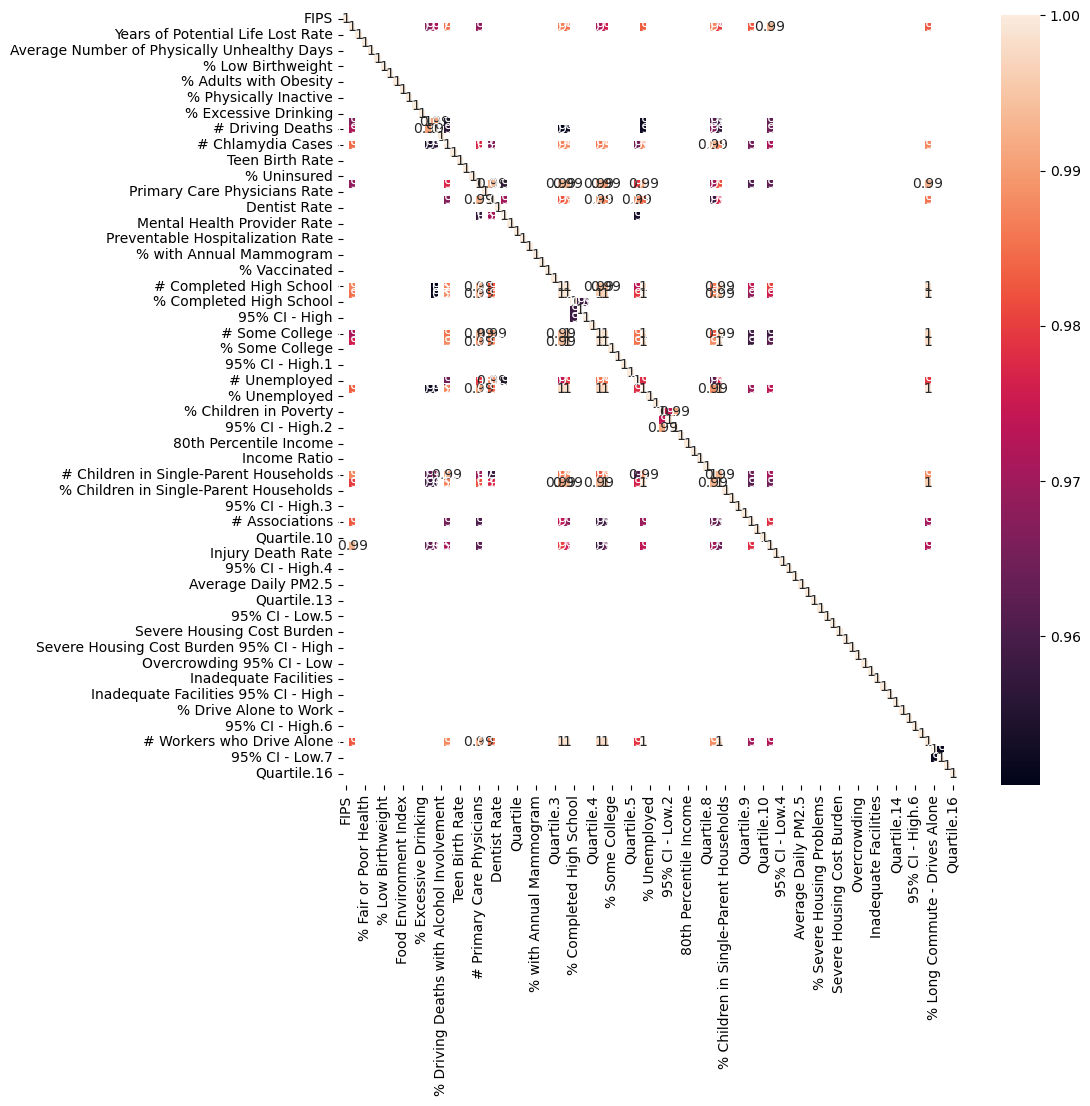

In [165]:
healthCorr = fullHealthFactors2.corr(numeric_only=True)
healthCorr = healthCorr[np.abs(healthCorr) > .95]
f, ax = plt.subplots(figsize = (10,10))
corr = sns.heatmap(healthCorr, annot = True, ax = ax)
#plt.yticks(range(len(healthSubset.columns)), healthSubset.columns, rotation = 45)

In [167]:
healthCorr = healthCorr[np.abs(healthCorr) > .95]
healthCorr

,FIPS,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Adults Reporting Currently Smoking,% Adults with Obesity,Food Environment Index,...,% Drive Alone to Work,95% CI - Low.6,95% CI - High.6,Quartile.15,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.7,95% CI - High.7,Quartile.16,Unnamed: 104
FIPS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Deaths,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.982571,NaN,NaN,NaN,NaN,NaN
Years of Potential Life Lost Rate,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
% Fair or Poor Health,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Number of Physically Unhealthy Days,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
% Long Commute - Drives Alone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.951848,NaN,NaN,NaN
95% CI - Low.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.951848,1.000000,NaN,NaN,NaN
95% CI - High.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Quartile.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [ ]:
fullHealthFactors2Subset = fullHealthFactors2[['Deaths', ]]